In [74]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.model_selection import KFold
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers.embeddings import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Bidirectional

In [75]:
a_file = open("misogyny.txt", "r")
print(a_file)

misogyny = []


for line in a_file:

    stripped_line = line.strip()

    line_list = stripped_line

    misogyny.append(line_list)

a_file.close()


#print(jerry_diags)
DF = pd.DataFrame()
DF["Mis"] = misogyny

<_io.TextIOWrapper name='misogyny.txt' mode='r' encoding='cp1252'>


In [76]:
a_file = open("drugs.txt", "r")
print(a_file)

drugs = []

for line in a_file:

    stripped_line = line.strip()

    line_list = stripped_line

    drugs.append(line_list)

a_file.close()

DF_drugs = pd.DataFrame()
DF_drugs['drugs'] = drugs




<_io.TextIOWrapper name='drugs.txt' mode='r' encoding='cp1252'>


In [77]:
a_file = open("violence.txt" , "r") 
print(a_file)

violence = []

for line in a_file:

    stripped_line = line.strip()

    line_list = stripped_line

    violence.append(line_list)

a_file.close()

DF_violence = pd.DataFrame()
DF_violence['violence'] = violence



#print(doroth_diags)


<_io.TextIOWrapper name='violence.txt' mode='r' encoding='cp1252'>


In [112]:
a_file = open("misogyny song.txt" , "r") 
print(a_file)

new = []

for line in a_file:

    stripped_line = line.strip()

    line_list = stripped_line

    new.append(line_list)

a_file.close()

DF_new= pd.DataFrame()
DF_new['new'] = new



#print(doroth_diags)


<_io.TextIOWrapper name='misogyny song.txt' mode='r' encoding='cp1252'>


In [113]:
DF_new

,new
0,She take my money when I'm in need
1,"Yeah, she's a triflin' friend indeed"
2,"Oh, she's a gold digger"
3,"Way over town, that digs on me"
4,"Now, I ain't sayin' she a gold digger"
...,...
73,"Get down girl, go 'head, get down"
74,"(I gotta leave) Get down girl, go 'head, get down"
75,"(I gotta leave) Get down girl, go 'head, get down"
76,"(I gotta leave) Get down girl, go 'head"


In [114]:
DF.dropna(inplace = True)
DF.drop([], inplace = True)
DF = DF[~DF.Mis.str.len().eq(0)]
DF_drugs = DF_drugs[~DF_drugs.drugs.str.len().eq(0)]
DF_violence = DF_violence[~DF_violence.violence.str.len().eq(0)]
DF_new = DF_new[~DF_new.new.str.len().eq(0)]

In [115]:
stop = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

In [116]:
from contextlib import redirect_stdout
with redirect_stdout(open(os.devnull, "w")):             ### Silence download progressing by re-directing to stdout
   nltk.download('stopwords')
   nltk.download('punkt')
   nltk.download('averaged_perceptron_tagger')
   nltk.download('wordnet')
   from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [117]:
stop = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

In [118]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [119]:
# function to identify & remove unwanted characters from text in "Combined Description"
temp3 =[]
for sentence in DF_new["new"]:
    sentence = sentence.lower() #lower case
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #removing HTML tags
    sentence = re.sub(r'\S+@\S+', 'EmailId', sentence)#removing mail ids
    sentence = re.sub(r'\S+@\S+', 'https', sentence)#removing https
    sentence = re.sub(r'\S+@\S+', 'http', sentence)#removing http
    sentence = re.sub(r'\'', '', sentence, re.I|re.A)
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'com ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'Subject: ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'\[cid:(.*)]', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello ', ' ', sentence, re.I|re.A)
    #sentence = re.sub(r'The information(.*)infection', ' ', sentence, re.I|re.A)  # footer
    #sentence = re.sub(r'Endava Limited is a company(.*)or omissions', ' ', sentence,  re.I|re.A)  # footer
    #sentence = re.sub(r'The information in this email is confidential and may be legally(.*)interference if you are not the intended recipient', ' ', sentence, re.I|re.A)  # footer
    #sentence = re.sub(r'select the following link to view the disclaimer in an alternate language.', ' ', sentence, re.I|re.A)  # disclaimer footer
    l_sentence = lemmatize_sentence(sentence)

    words = [word for word in l_sentence if word not in stopwords.words('english')]
    temp3.append(words)
    #print ("Sentence = ",sentence)

In [120]:
df = pd.DataFrame()
df['text'] = DF['Mis']
df['labels'] = 'Misogyny'

df2 = pd.DataFrame()
df2['text'] = DF_drugs['drugs']
df2['labels'] = 'drugs'

df = df.append(df2 , ignore_index=True)


df3 = pd.DataFrame()
df3['text'] = DF_violence['violence']
df3['labels'] = 'violence'
df = df.append(df3 , ignore_index=True)



In [121]:
# function to identify & remove unwanted characters from text in "Combined Description"
temp1 =[]
for sentence in df['text']:
    sentence = sentence.lower() #lower case
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #removing HTML tags
    sentence = re.sub(r'\S+@\S+', 'EmailId', sentence)#removing mail ids
    sentence = re.sub(r'\S+@\S+', 'https', sentence)#removing https
    sentence = re.sub(r'\S+@\S+', 'http', sentence)#removing http
    sentence = re.sub(r'\'', '', sentence, re.I|re.A)
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'com ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'Subject: ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'\[cid:(.*)]', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello ', ' ', sentence, re.I|re.A)
    #sentence = re.sub(r'The information(.*)infection', ' ', sentence, re.I|re.A)  # footer
    #sentence = re.sub(r'Endava Limited is a company(.*)or omissions', ' ', sentence,  re.I|re.A)  # footer
    #sentence = re.sub(r'The information in this email is confidential and may be legally(.*)interference if you are not the intended recipient', ' ', sentence, re.I|re.A)  # footer
    #sentence = re.sub(r'select the following link to view the disclaimer in an alternate language.', ' ', sentence, re.I|re.A)  # disclaimer footer
    l_sentence = lemmatize_sentence(sentence)

    words = [word for word in l_sentence.split() if word not in stopwords.words('english')]
    temp1.append(words)

    #print ("Sentence = ",sentence)

In [122]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " "  
    
    # traverse in the string   
    for ele in s:  
        
        str1 += ele   
        str1+=' '

    
    # return string   
    return str1  
        
        
# Driver code     
for sentence in range (len(temp1)):
  df['text'][sentence] = listToString(temp1[sentence])

In [123]:
df.head()

,text,labels
0,turn around bitch get use,Misogyny
1,besides aint get nothin good,Misogyny
2,annies twelve year old two shell whore,Misogyny
3,im staring tit,Misogyny
4,wrong way,Misogyny


In [124]:
DF_new

,new
0,She take my money when I'm in need
1,"Yeah, she's a triflin' friend indeed"
2,"Oh, she's a gold digger"
3,"Way over town, that digs on me"
4,"Now, I ain't sayin' she a gold digger"
...,...
73,"Get down girl, go 'head, get down"
74,"(I gotta leave) Get down girl, go 'head, get down"
75,"(I gotta leave) Get down girl, go 'head, get down"
76,"(I gotta leave) Get down girl, go 'head"


In [125]:
all_words = list()
for w in df['text']:
    all_words.append(w)

In [126]:
all_words = list()
for w in DF_new['new']:
    all_words.append(w)

In [24]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 240


In [127]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 55


In [128]:
index_dict = dict()
count = 1
index_dict['<unk>'] = 0
for word in set(all_words):
    index_dict[word] = count
    count += 1

In [129]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(df["labels"])

In [27]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
for i in Y:
  if i == 3:
    count1+=1
  elif i == 2:
    count2+=1
  elif i == 1:
    count3 += 1
  elif i == 0:
    count4+=1
print(count1 , count2 , count3 , count4)

0 52 94 117


In [28]:
df['text']

0                    turn around bitch get use 
1                 besides aint get nothin good 
2       annies twelve year old two shell whore 
3                                  im star tit 
4                                    wrong way 
                         ...                   
258            pistol whip till fell conscious 
259                 shes bloody layin red shit 
260     bitch press charge guarantee shes dead 
261                       first time play last 
262               yo dont interrupt im whoopin 
Name: text, Length: 263, dtype: object

In [130]:
(len(set(all_words)))

55

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

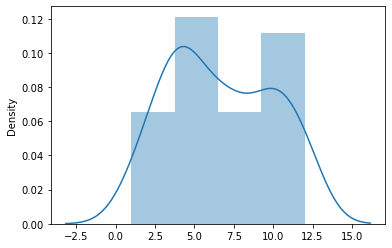

In [131]:
vocab_size = (len(set(all_words)))  # There are 6655 words in total
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(DF_new['new'])

train_inputs = tokenizer.texts_to_sequences(DF_new['new'])
sns.distplot([len(l) for l in train_inputs])

In [139]:
X = tokenizer.texts_to_sequences(DF_new['new'])
X = pad_sequences(X, maxlen = len(set(all_words)))
y = np.asarray(DF_new['new'])

print("Number of Samples:", len(X))
print(X[15])
print("Number of Labels: ", len(y))
print(y[15])


Number of Samples: 78
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 11 18  7]
Number of Labels:  78
"Far as girls, you got a flock"


In [31]:
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen = len(set(all_words)))
y = np.asarray(df['text'])

print("Number of Samples:", len(X))
print(X[200])
print("Number of Labels: ", len(y))
print(y[200])

Number of Samples: 263
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 22 75]
Number of Labels:  263
 need dope 


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(210, 240) (210,)
(53, 240) (53,)


In [133]:
Embedding((len(set(all_words))), 32, input_length= len(set(all_words)))

In [134]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocab_size, embed_dim,input_length = len(set(all_words))))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 55, 128)           7040      
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 55, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 591       
Total params: 262,431
Trainable params: 262,431
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [36]:
batch_size = 32
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), shuffle = True,  epochs = 20, batch_size= 50, verbose = 2)

Epoch 1/20
5/5 - 13s - loss: 1.3522 - accuracy: 0.3000 - val_loss: 1.1983 - val_accuracy: 0.4906
Epoch 2/20
5/5 - 3s - loss: 1.1419 - accuracy: 0.4333 - val_loss: 1.0386 - val_accuracy: 0.4906
Epoch 3/20
5/5 - 3s - loss: 1.0645 - accuracy: 0.4571 - val_loss: 1.0512 - val_accuracy: 0.4906
Epoch 4/20
5/5 - 3s - loss: 1.0263 - accuracy: 0.4429 - val_loss: 1.0164 - val_accuracy: 0.6981
Epoch 5/20
5/5 - 3s - loss: 0.9920 - accuracy: 0.6810 - val_loss: 0.9820 - val_accuracy: 0.5283
Epoch 6/20
5/5 - 3s - loss: 0.9568 - accuracy: 0.4381 - val_loss: 0.9533 - val_accuracy: 0.6604
Epoch 7/20
5/5 - 3s - loss: 0.8996 - accuracy: 0.8048 - val_loss: 0.9200 - val_accuracy: 0.7358
Epoch 8/20
5/5 - 3s - loss: 0.8121 - accuracy: 0.8238 - val_loss: 0.8587 - val_accuracy: 0.6792
Epoch 9/20
5/5 - 3s - loss: 0.6975 - accuracy: 0.8524 - val_loss: 0.9627 - val_accuracy: 0.5094
Epoch 10/20
5/5 - 3s - loss: 0.6484 - accuracy: 0.7952 - val_loss: 0.7871 - val_accuracy: 0.6792
Epoch 11/20
5/5 - 3s - loss: 0.5264 - 

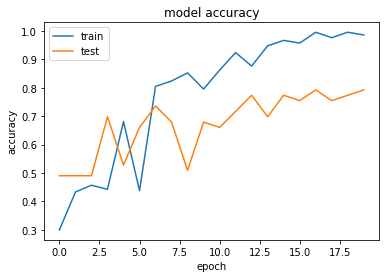

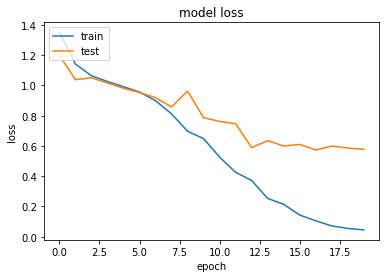

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [135]:
# predict probabilities for test set
Y_pred = model.predict(X, verbose=0)

In [110]:
print(metrics.classification_report (Y_test, np.argmax(Y_pred, axis = 1),zero_division=1,target_names=np.unique(encoder.inverse_transform(Y_test))))

ValueError: Found input variables with inconsistent numbers of samples: [53, 76]

In [136]:
Y_pred

array([[0.33544028, 0.33443987, 0.33011985],
       [0.3347597 , 0.3364443 , 0.328796  ],
       [0.3385195 , 0.3325232 , 0.32895732],
       [0.33960742, 0.33138698, 0.32900563],
       [0.3371415 , 0.33109826, 0.33176023],
       [0.33297262, 0.33240137, 0.334626  ],
       [0.33691162, 0.3303363 , 0.3327521 ],
       [0.33297262, 0.33240137, 0.334626  ],
       [0.33180666, 0.33524385, 0.3329494 ],
       [0.33180666, 0.33524385, 0.3329494 ],
       [0.33180666, 0.33524385, 0.3329494 ],
       [0.333891  , 0.33407104, 0.3320379 ],
       [0.3365319 , 0.33439192, 0.32907614],
       [0.33567202, 0.33588144, 0.32844657],
       [0.33500215, 0.33394146, 0.33105642],
       [0.33722162, 0.33567905, 0.32709932],
       [0.33434796, 0.3362529 , 0.32939917],
       [0.33763555, 0.33355272, 0.32881168],
       [0.33672234, 0.33354795, 0.3297297 ],
       [0.33653277, 0.3332682 , 0.3301991 ],
       [0.33389294, 0.334865  , 0.33124208],
       [0.3318809 , 0.33666518, 0.33145392],
       [0.

In [41]:
predictions = []
for i in range (len(Y_pred)):
  for j in range (4):
      if (Y_pred[i][j] == Y_pred[i].max()):
        predictions.append(j)
predictions = np.array(predictions)

In [42]:
print(Y_test)
print(predictions)

[0 1 2 2 0 2 1 2 0 0 0 0 0 2 1 2 0 0 2 0 1 1 0 2 0 1 0 0 1 0 0 1 2 1 0 1 0
 2 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0]
[1 1 0 2 0 2 1 2 2 0 0 0 0 2 0 2 0 0 2 1 1 1 0 1 0 1 0 2 1 0 2 1 2 1 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0]


In [43]:
thresholds = []
for i in range (len(Y_pred)):
  for j in range (4):
      if (Y_pred[i][j] >= 0.4):
        thresholds.append(j)
      else:
        thresholds.append(9)
thresholds = np.array(thresholds)

In [44]:
thresholds

array([0, 1, 9, 9, 9, 1, 9, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 9, 9, 9, 9, 9,
       2, 9, 9, 1, 9, 9, 9, 9, 2, 9, 9, 9, 2, 9, 0, 9, 9, 9, 0, 9, 9, 9,
       0, 9, 9, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 9,
       9, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 1, 9, 9, 9, 1, 9, 9, 9, 1, 9, 9,
       0, 9, 9, 9, 9, 1, 9, 9, 0, 9, 9, 9, 9, 1, 9, 9, 0, 9, 9, 9, 9, 9,
       9, 9, 9, 1, 9, 9, 0, 9, 9, 9, 9, 9, 2, 9, 9, 1, 9, 9, 9, 9, 2, 9,
       9, 1, 9, 9, 0, 9, 9, 9, 0, 9, 9, 9, 0, 9, 9, 9, 0, 9, 9, 9, 9, 1,
       9, 9, 0, 9, 9, 9, 9, 1, 9, 9, 0, 9, 9, 9, 0, 9, 9, 9, 9, 1, 9, 9,
       0, 9, 9, 9, 9, 1, 9, 9, 9, 1, 2, 9, 0, 9, 9, 9, 0, 9, 9, 9, 9, 1,
       9, 9, 9, 1, 9, 9, 9, 1, 9, 9, 0, 9, 9, 9])

In [45]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(X, Y)
print(bgcl.oob_score_)

0.8288973384030418


In [46]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, Y_train)

In [47]:
test_pred = abcl.predict(X_test)
abcl.score(X_test , Y_test)

0.6415094339622641

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, Y_train)

In [50]:
test_pred = gbcl.predict(X_test)
gbcl.score(X_test , Y_test)

0.7547169811320755

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [52]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
dt_model.score(X_test , Y_test)

0.7169811320754716